# Pairs Trading Strategy

In pairs trading, two securities A and B with the same economic characteristics are traded together as a pair. For example, consider two companies in the same sector with similar services or products (e.g. Visa and MasterCard, or NVIDIA and AMD). Because such securites are usually viewed similary by traders, they can have a constant spread (ratio or difference in prices). However, every once in a while there might be a divergence in the spread between these two pairs. The price divergence within a pair could be caused for a variety of reasons such as a large buy/sell orders for one security, or an important news about one of the companies, etc. When such a temporary divergence occurs, one could buy the underperforming security and sell the outperforming security, believing that the spread between the two would eventually converge. It is possible to profit from pairs trading regardless of the overall trend of the market (even if both securites are in an uptrend or downtrend), as long as the security that was bought outperforms the one that was shorted for trading time period.

In [1]:
import numpy as np
import pandas as pd

# for getting stock data 
import pandas_datareader.data as web 

# for testing for cointegration between two securites
import statsmodels
from statsmodels.tsa.stattools import coint

# set the seed for the random number generator
np.random.seed(100)

import matplotlib.pyplot as plt

In [2]:
# gets the stock prices for a set of stocks (symbols_list) between the start and end date
# resturns a dataframe with date as the index and a stock price data in each column
def get_stock_prices(symbols_list, start_date, end_date) :
    symbols=[]
    for ticker in symbols_list: 
        try:
            r = web.DataReader(ticker, data_source='yahoo', start=start_date, end=end_date)
            # add a symbol column
            r['Symbol'] = ticker 
            symbols.append(r)
        except:
            print("Exception: No data fetched for symbol \"" + ticker + "\"")
            continue
        
    df = pd.concat(symbols)
    df = df[['Adj Close', 'Symbol']]
    table = df.pivot(columns='Symbol', values='Adj Close')
    return table

In [3]:
startDateStr = '2007/12/01'
endDateStr = '2030/12/01'
instrumentIds = ['SPY','AAPL','ADBE','EBAY','MSFT','QCOM','HPQ','JNPR','AMD','IBM']
df = get_stock_prices(instrumentIds, startDateStr, endDateStr)
df.head()

Symbol,AAPL,ADBE,AMD,EBAY,HPQ,IBM,JNPR,MSFT,QCOM,SPY
Date,,,,,,,,,,
2007-12-03,22.179686,42.689999,9.66,13.661503,15.025317,73.906471,26.941256,24.791126,29.485632,114.789757
2007-12-04,22.297489,43.320000,9.25,13.653210,15.105742,74.465149,26.976734,24.678171,29.042900,113.763718
2007-12-05,23.003084,43.900002,8.91,13.827349,15.388736,75.533638,27.766254,25.717409,29.894487,115.668106
2007-12-06,23.554907,44.540001,9.07,14.001486,15.552569,76.609077,27.721901,26.018639,29.924101,117.323738
2007-12-07,24.094334,44.369999,9.05,13.984900,15.442355,76.022484,27.411415,26.003574,29.709354,117.300438


### Cointegration
Cointegration, very loosely speaking, is a "different" form of correlation. If two series are cointegrated, the ratio between them will vary around a mean.
For pairs trading to work between two timeseries, the expected value of the ratio over time must converge to the mean, i.e. they should be cointegrated.
The time series we conctructued above are cointegrated. 

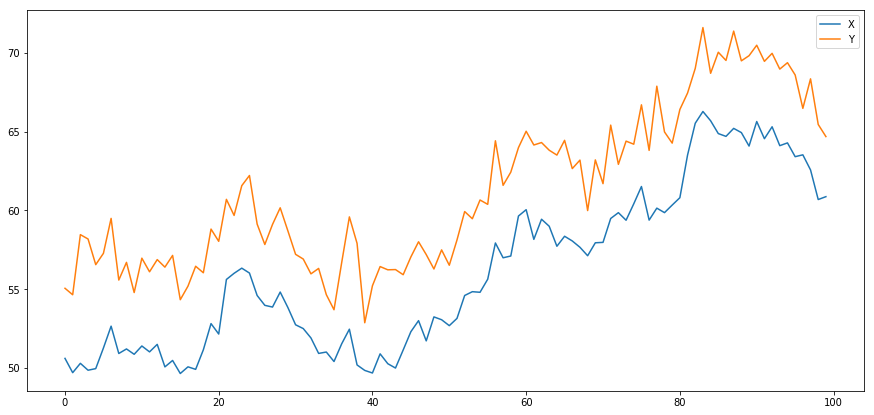

In [7]:
# Generate the daily returns
Xreturns = np.random.normal(0, 1, 100) 
# sum them and shift all the prices up
X = pd.Series(np.cumsum(Xreturns), name='X') + 50

# create a cointegrated series Y
noise = np.random.normal(0, 1, 100)
Y = X + 5 + noise
Y.name = 'Y'
pd.concat([X, Y], axis=1).plot(figsize=(15,7))
plt.show()

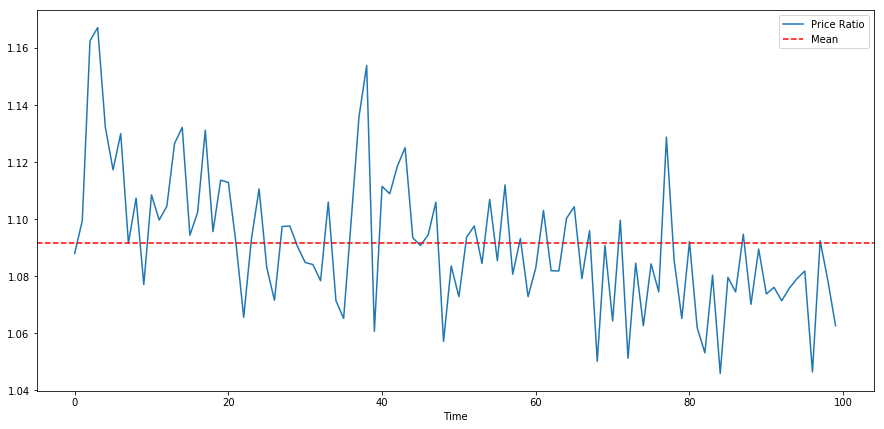

In [8]:
(Y/X).plot(figsize=(15,7)) 
plt.axhline((Y/X).mean(), color='red', linestyle='--') 
plt.xlabel('Time')
plt.legend(['Price Ratio', 'Mean'])
plt.show()

### Testing for Cointegration
There is a convenient test that lives in statsmodels.tsa.stattools. We should see a very low p-value, as we've artifically created two series that are as cointegrated as physically possible.

In [12]:
# compute the p-value of the cointegration test
# will inform us as to whether the ratio between the 2 timeseries is stationary
# around its mean
score, pvalue, _ = coint(X,Y)
print("score: ", score)
print("pvalue: ", pvalue)

score:  -9.084713408593794
pvalue:  5.286956139213166e-14


Let's looking at how two cointegrated series might look like

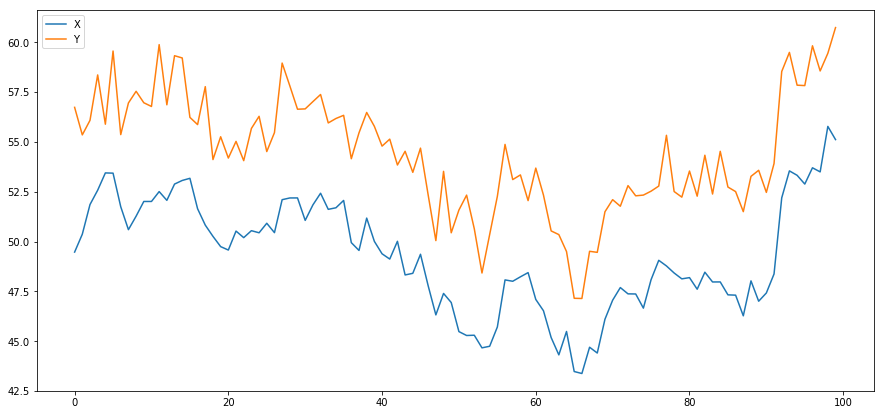

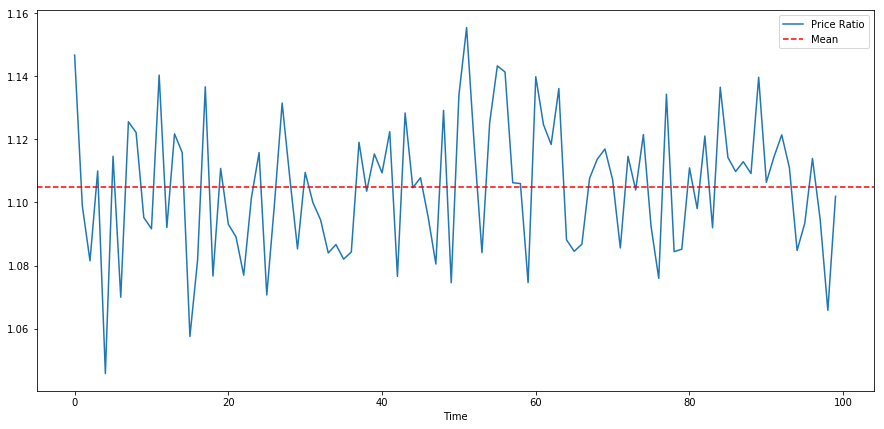

score:  -10.387466745035258
pvalue:  2.6531850075913872e-17
correlation coeff:  0.9393075768096351


In [76]:
# Generate the daily returns
Xreturns = np.random.normal(0, 1, 100) 
# sum them and shift all the prices up
X = pd.Series(np.cumsum(Xreturns), name='X') + 50

# create a cointegrated series Y
noise = np.random.normal(0, 1, 100)
Y = X + 5 + noise
Y.name = 'Y'
pd.concat([X, Y], axis=1).plot(figsize=(15,7))
plt.show()
(Y/X).plot(figsize=(15,7)) 
plt.axhline((Y/X).mean(), color='red', linestyle='--') 
plt.xlabel('Time')
plt.legend(['Price Ratio', 'Mean'])
plt.show()
# compute the p-value of the cointegration test
# will inform us as to whether the ratio between the 2 timeseries is stationary
# around its mean
score, pvalue, _ = coint(X,Y)
print("score: ", score)
print("pvalue: ", pvalue)
print("correlation coeff: ", X.corr(Y))

Now let's look at the score, pvalue and correlation of two random series

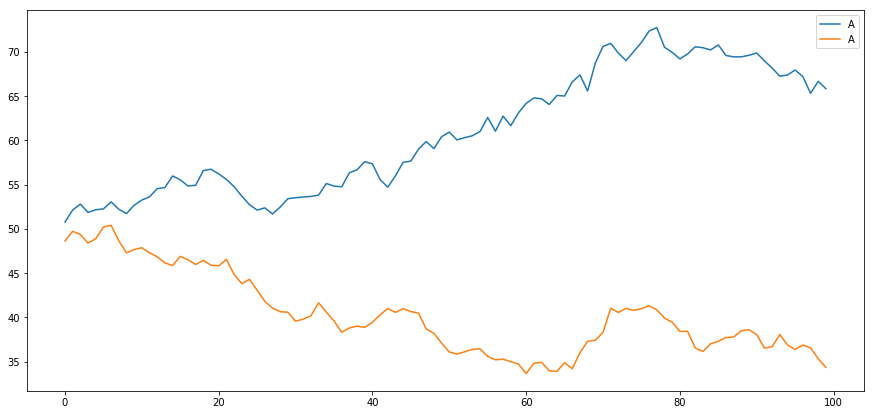

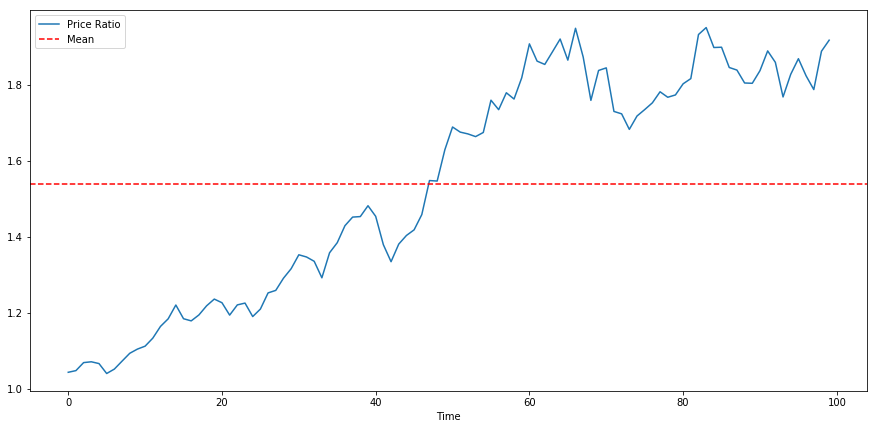

score:  -1.3995750802838733
pvalue:  0.797658861250852
correlation coeff:  -0.6477003484184105


In [73]:
# Generate the daily returns
A_returns = np.random.normal(0, 1, 100) 
B_returns = np.random.normal(0, 1, 100) 
# sum them and shift all the prices up
A = pd.Series(np.cumsum(A_returns), name='A') + 50
B = pd.Series(np.cumsum(B_returns), name='A') + 50
pd.concat([A, B], axis=1).plot(figsize=(15,7))
plt.show()
(A/B).plot(figsize=(15,7)) 
plt.axhline((A/B).mean(), color='red', linestyle='--') 
plt.xlabel('Time')
plt.legend(['Price Ratio', 'Mean'])
plt.show()
# compute the p-value of the cointegration test
# will inform us as to whether the ratio between the 2 timeseries is stationary
# around its mean
score, pvalue, _ = coint(A,B)
print("score: ", score)
print("pvalue: ", pvalue)
print("correlation coeff: ", A.corr(B))

### How to make a pairs trade?
Because two cointegrated time series (such as X and Y above) drift towards and apart from each other, there will be times when the spread is high and times when the spread is low. We make a pairs trade by buying one security and selling another. This way, if both securities go down together or go up together, we neither make nor lose money — we are market neutral.


### Using Data to find securities that behave like this
The best way to do this is to start with securities you suspect may be cointegrated and perform a statistical test. If you just run statistical tests over all pairs, you’ll fall prey to multiple comparison bias.

So let’s try to find some securities that display cointegration. Let’s work with a basket of US large cap tech stocks — in S&P 500. These stocks operate in a similar segment and could have cointegrated prices. We scan through a list of securities and test for cointegration between all pairs. It returns a cointegration test score matrix, a p-value matrix, and any pairs for which the p-value was less than 0.05.


In [77]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            
            corr_coeff = S1.corr(S2)
            
            # if p-value < 0.5 and score < -3.0 and correlation is > 0.9
            total_score = 0
            if pvalue < 0.05:
                total_score += 1
            if score < -3.0:
                total_score += 1
            if corr_coeff > 0.90:
                total_score += 1
            
            # 2 out of 3
            if total_score > 2:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [80]:
startDateStr = '2016/12/01'
endDateStr = '2019/12/01'
instrumentIds = ['SPY','QQQ','AAPL','ADBE','AMD','AMZN', 'EBAY', 'GOOGL','MA','MSFT','QCOM', 
                 'JNPR', 'NVDA', 'V', 'BAC', 'JPM', 'PEP', 'COKE']
data = get_stock_prices(instrumentIds, startDateStr, endDateStr)
data.head(3)

Symbol,AAPL,ADBE,AMD,AMZN,BAC,COKE,EBAY,GOOGL,JNPR,JPM,MA,MSFT,NVDA,PEP,QCOM,QQQ,SPY,V
Date,,,,,,,,,,,,,,,,,,
2016-12-01,104.344177,99.510002,8.39,743.650024,20.321154,156.565506,26.982458,764.330017,24.916630,74.892586,98.225624,55.939449,86.666466,90.553711,57.269257,112.208984,206.224258,73.822746
2016-12-02,104.734901,99.730003,8.53,740.340027,20.065958,155.196838,27.997133,764.460022,24.778101,74.718613,99.127693,55.986698,87.467453,91.989319,58.768818,112.432487,206.327560,74.106567
2016-12-05,103.982048,101.949997,8.68,759.359985,20.642508,157.559998,27.928173,778.219971,24.870453,76.238625,101.529884,56.903275,90.859344,92.089905,59.232983,113.307060,207.567337,75.662704


In [81]:
scores, pvalues, pairs = find_cointegrated_pairs(data)
print(pairs)

[('GOOGL', 'JPM'), ('GOOGL', 'QQQ'), ('GOOGL', 'SPY'), ('MA', 'MSFT'), ('MA', 'V'), ('QQQ', 'SPY')]


Lets  run our method on the list and see if any pairs are cointegrated.

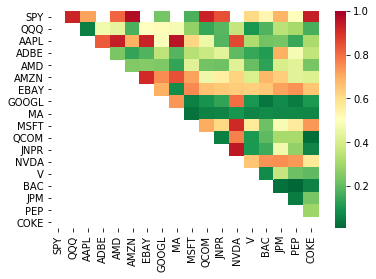

[('MA', 'V')]


In [65]:
# Heatmap to show the p-values of the cointegration test
# between each pair of stocks

scores, pvalues, pairs = find_cointegrated_pairs(data)
import seaborn
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=instrumentIds, 
                yticklabels=instrumentIds, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.98)
                )
plt.show()
print(pairs)

Looks like 'ADBE' and 'MSFT' are cointegrated. Let's take a look at the prices to make sure there's nothing weird going on

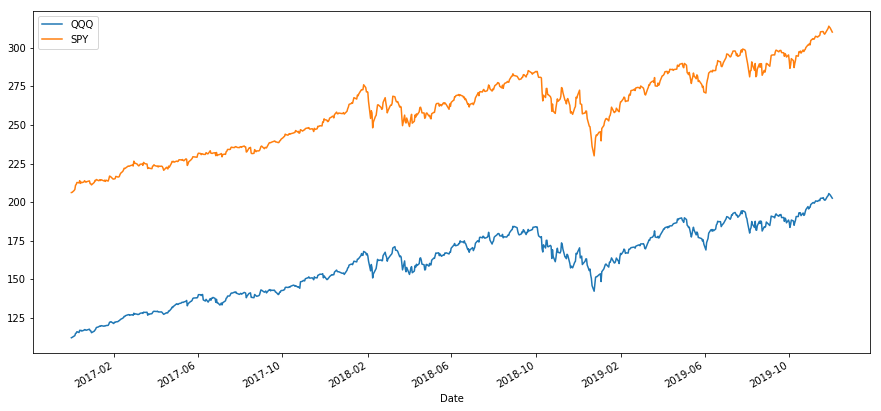

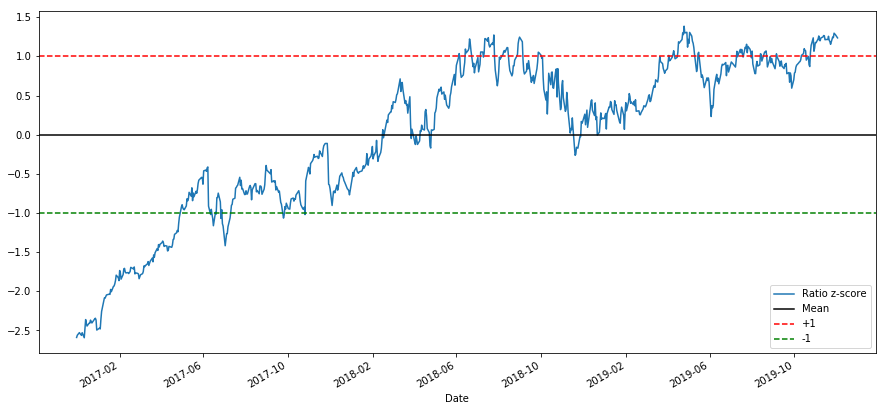

score:  -3.627047688125886
pvalue:  0.022675258255801564
correlation coeff:  0.9932989125844889


In [82]:
S1 = data['QQQ']
S2 = data['SPY']
pd.concat([S1, S2], axis=1).plot(figsize=(15,7))
plt.show()
ratios = S1/S2
def zscore(series):
    return (series - series.mean()) / np.std(series)
zscore(ratios).plot(figsize=(15,7))
plt.axhline(zscore(ratios).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
plt.show()
# compute the p-value of the cointegration test
# will inform us as to whether the ratio between the 2 timeseries is stationary
# around its mean
score, pvalue, _ = coint(S1,S2)
print("score: ", score)
print("pvalue: ", pvalue)
print("correlation coeff: ", S1.corr(S2))

0.09734416279835606


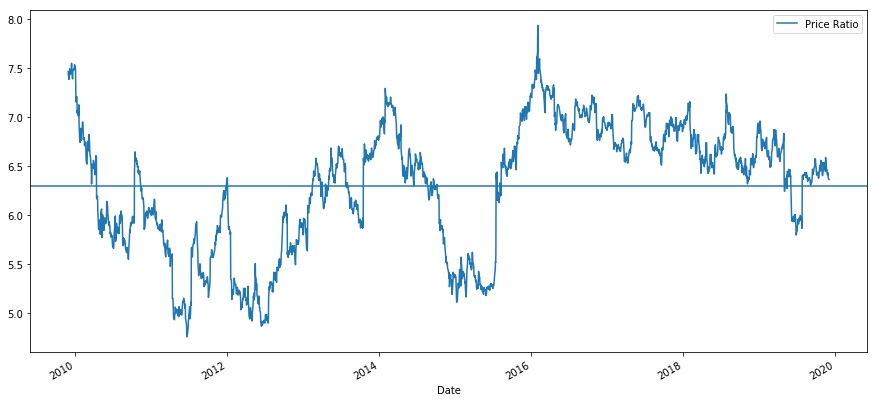

In [43]:
S1 = data['GOOGL']
S2 = data['QQQ']
score, pvalue, _ = coint(S1, S2)
print(pvalue)
ratios = S1 / S2
ratios.plot(figsize=(15,7))
plt.axhline(ratios.mean())
plt.legend(['Price Ratio'])
plt.show()

The ratio does look like it moved around a stable mean.The absolute ratio isn’t very useful in statistical terms. It is more helpful to normalize our signal by treating it as a z-score. Z score is defined as:

<i>Z Score (Value) = (Value — Mean) / Standard Deviation </i>

<b>WARNING</b>
In practice this is usually done to try to give some scale to the data, but this assumes an underlying distribution. Usually normal. However, much financial data is not normally distributed, and we must be very careful not to simply assume normality, or any specific distribution when generating statistics. The true distribution of ratios could be very fat-tailed and prone to extreme values messing up our model and resulting in large losses.

In [44]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

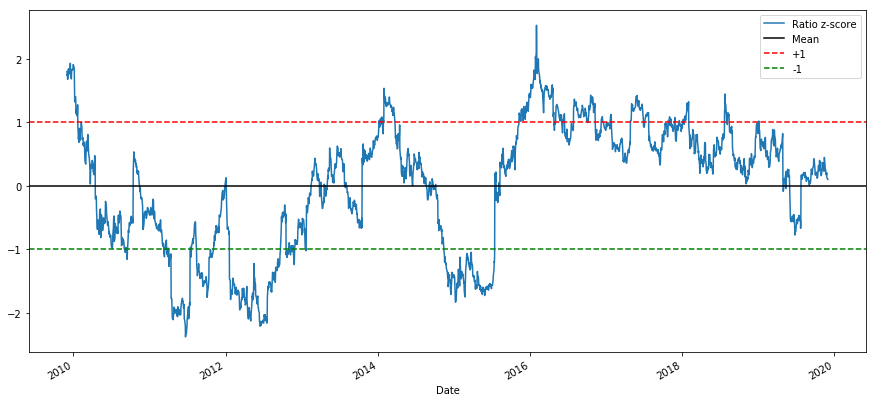

In [45]:
zscore(ratios).plot(figsize=(15,7))
plt.axhline(zscore(ratios).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
plt.show()

### Simple Strategy:
* Go "Long" the ratio whenever the z-score is below -1.0
* Go "Short" the ratio when the z-score is above 1.0
* Exit positions when the z-score approaches zero

This is just the tip of the iceberg, and only a very simplistic example to illustrate the concepts.
* In practice you would want to compute a more optimal weighting for how many shares to hold for S1 and S2
* You would also want to trade using constantly updating statistics. 

In general taking a statistic over your whole sample size can be bad. For example, if the market is moving up, and both securities with it, then your average price over the last 3 years may not be representative of today. For this reason traders often use statistics that rely on rolling windows of the most recent data.

Instead of using ratio values, let's use 5d Moving Average to compute the z score, and the 60d Moving Average and 60d Standard Deviation as the mean and standard deviation.

First break the data into training set of 7 years and test set of 3 years

In [86]:
ratios = data['ADBE'] / data['MSFT']
print(len(ratios))
train = ratios[:1762]
test = ratios[1762:]

2519


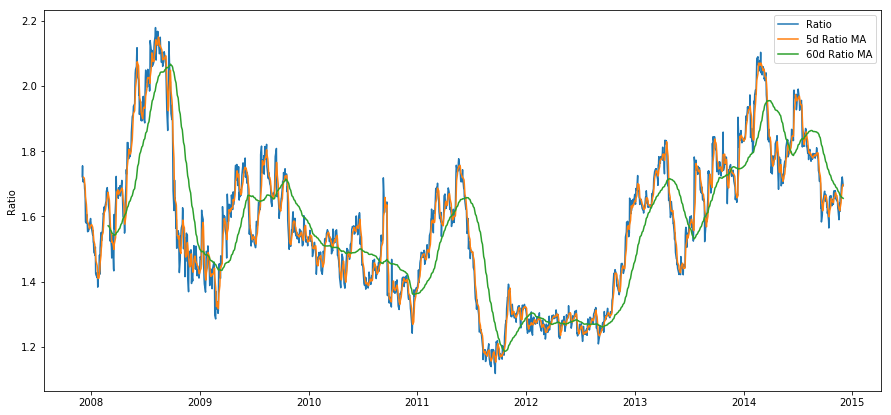

In [87]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()

ratios_mavg60 = train.rolling(window=60, center=False).mean()

std_60 = train.rolling(window=60, center=False).std()

zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(15,7))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)

plt.legend(['Ratio','5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

We can use the moving averages to compute the z-score of the ratio at each given time. This will tell us how extreme the ratio is and whether it's a good idea to enter a position at this time. Let's take a look at the z-score now.


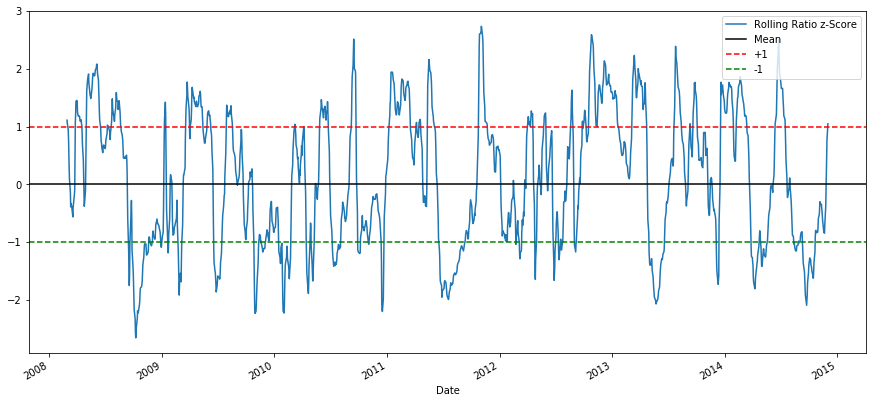

In [89]:
# Take a rolling 60 day standard deviation
std_60 = train.rolling(window=60,center=False).std()
std_60.name = 'std 60d'

# Compute the z score for each day
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
zscore_60_5.name = 'z-score'

plt.figure(figsize=(15,7))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

The z-score doesn't mean much out of context, let's plot it next to the prices to get an idea of what it looks like.


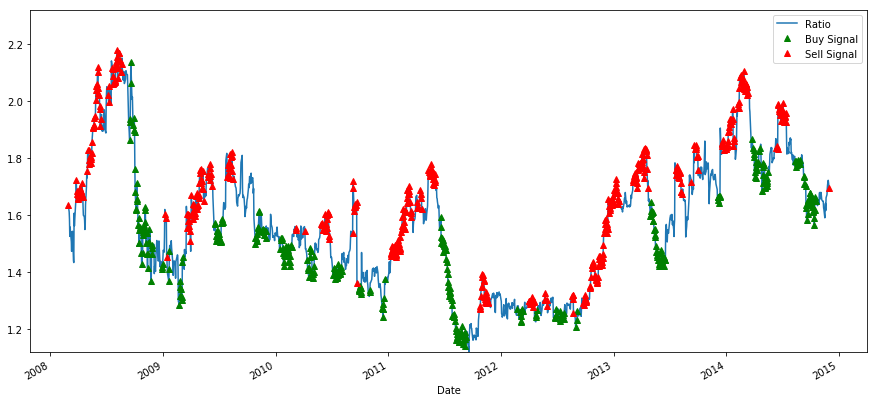

In [90]:
# Plot the ratios and buy and sell signals from z score
plt.figure(figsize=(15,7))

train[60:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

What does that mean for actual stocks that we are trading? Let’s take a look

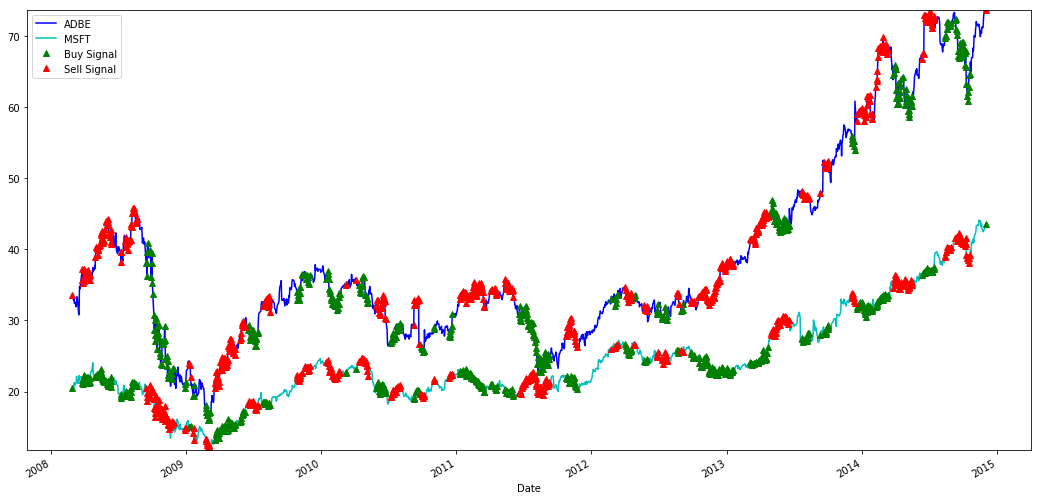

In [91]:
# Plot the prices and buy and sell signals from z score
plt.figure(figsize=(18,9))
S1 = data['ADBE'].iloc[:1762]
S2 = data['MSFT'].iloc[:1762]

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When buying the ratio, buy S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))

plt.legend(['ADBE','MSFT', 'Buy Signal', 'Sell Signal'])
plt.show()


Notice how we sometimes make money on the short leg and sometimes on the long leg, and sometimes both.

Let’s see what kind of profits this signal can generate. We write a simple backtester which buys 1 ratio (buy 1 ADBE stock and sell ratio x MSFT stock) when ratio is low, sell 1 ratio (sell 1 ADBE stock and buy ratio x MSFT stock) when it’s high and calculate PnL of these trades.

In [93]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] > 1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
        # Buy long if the z-score is < 1
        elif zscore[i] < -1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.5:
            money += countS1*S1[i] - S2[i] * countS2
            count = 0
            
    return money

trade(data['ADBE'].iloc[:1762], data['MSFT'].iloc[:1762], 60, 5)


740147.306756571

The strategy seems profitable! Now we can optimize further by changing our moving average windows, by changing the thresholds for buy/sell and exit positions etc and check for performance improvements on validation data.
We could also try more sophisticated models like Logisitic Regression, SVM etc to make our 1/-1 predictions.

Let's see how it does on test data

In [94]:
trade(data['ADBE'].iloc[1762:], data['MSFT'].iloc[1762:], 60, 5)

534413.2762107453

Profits again!

### Avoid Overfitting

Overfitting is the most dangerous pitfall of a trading strategy. In our model, we used rolling parameter estimates and may wish to optimize window length. We can simply iterate over all possible, reasonable window lengths and pick the length based on which our model performs the best . Below we write a simple loop to to score window lengths based on pnl of training data and find the best one.

In [128]:
# Find the window length 0-254 
# that gives the highest returns using this strategy
length_scores = [trade(data['ADBE'].iloc[:1762], 
                data['MSFT'].iloc[:1762], l, 5) 
                for l in range(255)]
best_length = np.argmax(length_scores)
print ('Best window length:', best_length)

('Best window length:', 40)


Now we check the performance of our model on test data and we find that this window length is far from optimal! This is because our original choice was clearly overfitted to the sample data.

In [105]:
# Find the returns for test data
# using what we think is the best window length
length_scores2 = [trade(data['ADBE'].iloc[1762:], 
                  data['MSFT'].iloc[1762:],l,5) 
                  for l in range(255)]
print (best_length, 'day window:', length_scores2[best_length])

# Find the best window length based on this dataset, 
# and the returns using this window length
best_length2 = np.argmax(length_scores2)
print (best_length2, 'day window:', length_scores2[best_length2])

(40, 'day window:', 1252233.1394537962)
(15, 'day window:', 1449116.452194867)


We can see this if we also plot Pnl by window length separately for traning and test data

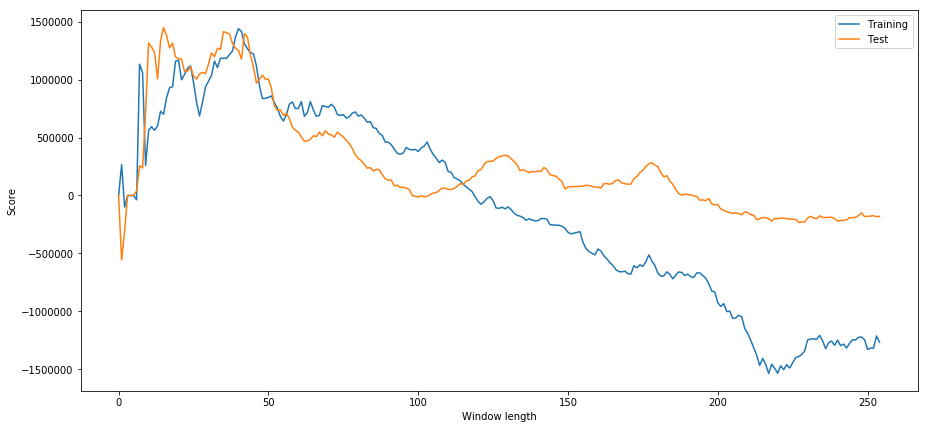

In [107]:
plt.figure(figsize=(15,7))
plt.plot(length_scores)
plt.plot(length_scores2)
plt.xlabel('Window length')
plt.ylabel('Score')
plt.legend(['Training', 'Test'])
plt.show()